In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sc=pd.read_csv('student_clustering.csv')
sc.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [3]:
sc.shape

(200, 2)

In [4]:
sc.columns

Index(['cgpa', 'iq'], dtype='object')

In [5]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [6]:
sc.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [7]:
sc.isnull().sum()

cgpa    0
iq      0
dtype: int64

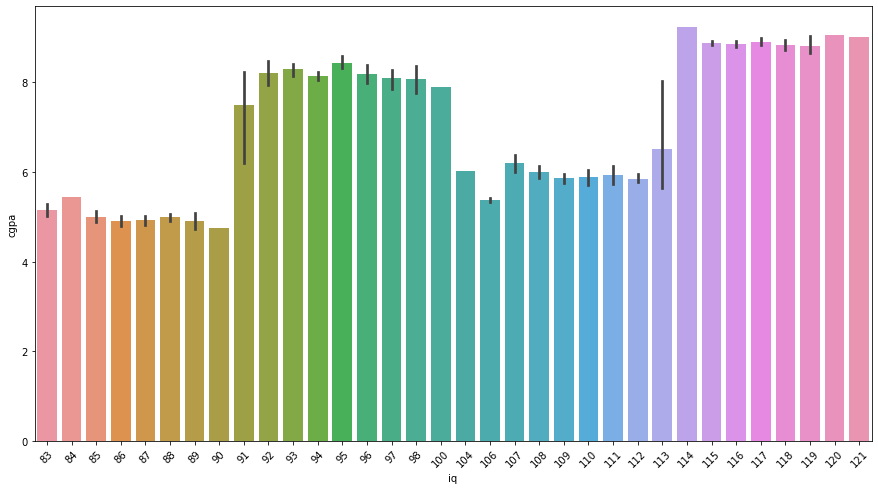

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x='iq',y='cgpa',data=sc)
plt.xticks(rotation=45)
plt.show()

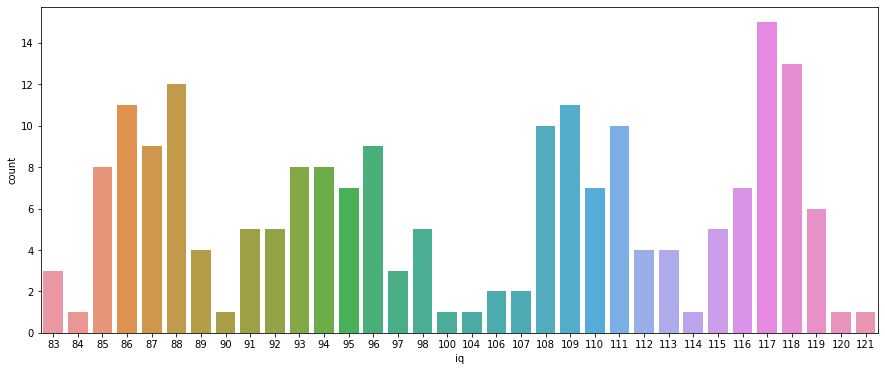

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x='iq',data=sc)
plt.show()

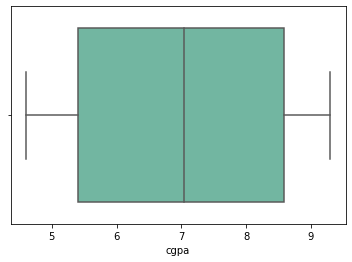

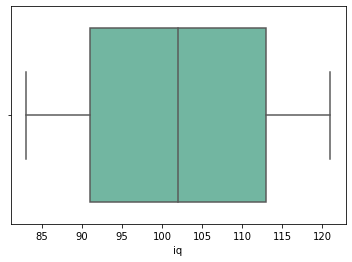

In [10]:
for i in sc.columns:
    sns.boxplot(x=sc[i],orient='h',palette='Set2')
    plt.show()

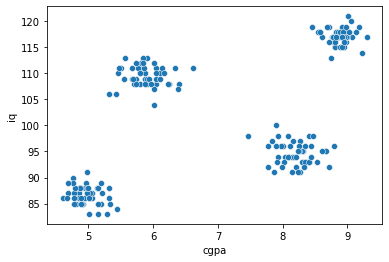

In [11]:
sns.scatterplot(x='cgpa',y='iq',data=sc)
plt.show()

In [12]:
from sklearn.cluster import KMeans

In [13]:
data=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(sc)
    data.append(km.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
data

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),data)
plt.grid()
plt.show()

In [ ]:
x=sc.iloc[:,:].values
km=KMeans(n_clusters=5)
y_means=km.fit_predict(x)

In [ ]:
y_means

In [ ]:
x[y_means==0]

In [ ]:
x[y_means==0,0],x[y_means==0,1]

In [ ]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='red')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='green')
plt.scatter(x[y_means==2,0],x[y_means==2,1],color='blue')
plt.scatter(x[y_means==3,0],x[y_means==3,1],color='orange')
plt.scatter(x[y_means==4,0],x[y_means==4,1],color='yellow')
plt.xlabel('cgpa')
plt.ylabel('iq')

In [ ]:
x=sc.drop(['cgpa'],axis=1)
y=sc.cgpa

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print('training accuracy: ',model.score(x_train,y_train))
print('testing accuracy: ',model.score(x_test,y_test))